# Sentiment analysis on the Amazon review dataset, using RandomForest

We begin by importing the various libraries and functions we will need.

In [1]:
import timeit
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

Note that we are importing a previously processed csv file.

In [2]:
# Importing data start timer
print('Importing data')
start = timeit.default_timer()

data_train = pd.read_csv('data/amazon_clean_train.csv', encoding='utf-8')
data_test = pd.read_csv('data/amazon_clean_test.csv', encoding='utf-8')

# Importing data stop timer
stop = timeit.default_timer()
print('Time: ', stop - start)

data_train.Label.value_counts()
data_test.Label.value_counts()

Importing data
Time:  15.417480299998715


1    200000
0    200000
Name: Label, dtype: int64

### Vectorizing
We now need to vectorize our data. Here we need to explain some aspects of what we are doing. 

The CountVectorizer was used both to prepare the strings, but also to strip away some useless data (that caused clutter in the dataset). The exact values were found through a bit of trial and error. CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. [5]

The reason we use apply(lambda x: np.str_(x)) is that we had occasional problems where, in spite of our efforts, we found that sometimes a line in the dataset was not recognised as a string. We found that the apply lambda function was a quick and easy way to get around this problem.

In [3]:
cv = CountVectorizer(min_df = 25, max_df = 0.8)
print('Fitting vectors')
# Fitting vectors start timer
start = timeit.default_timer()
trainX = cv.fit_transform(data_train['Review'].apply(lambda x: np.str_(x)))
testX = cv.transform(data_test['Review'].apply(lambda x: np.str_(x)))
testY = data_test['Label'].values.astype(int)
trainY = data_train['Label'].values.astype(int)
# Fitting vectors stop timer
stop = timeit.default_timer()
print('Time: ', stop - start)

Fitting vectors
Time:  173.04015629999776


# Random Forest

Random Forest is a very powerful supervised machine learning algorithm that produces great results most of the time. It is very flexible, simple and easy to use algorithm. It is capable of solving both classification and regression problems. As the name suggest, this algorithm creates the forest with a number of decision trees. More trees in the forest, more robust the prediction would be. [1]

It is an ensemble tree-based learning algorithm. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object. Ensemble algorithms are those which combine more than one algorithms of same or different kind for classifying objects. [6]

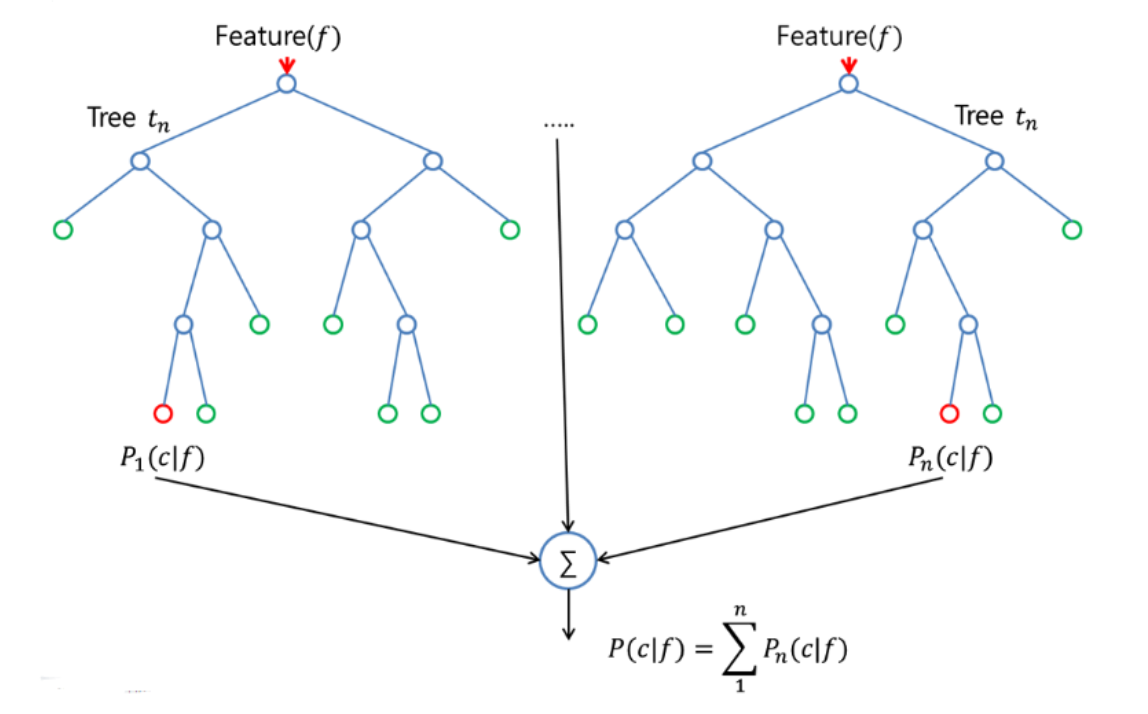

Random forest has nearly the same hyperparameters as a decision tree or a bagging classifier. Fortunately, there's no need to combine a decision tree with a bagging classifier because we can easily use the classifier-class of random forest. Each individual tree in the random forest determines a class prediction and the class predicted more frequently becomes the model's prediction. Below figure is the visualization of a Random Forest model making a prediction.

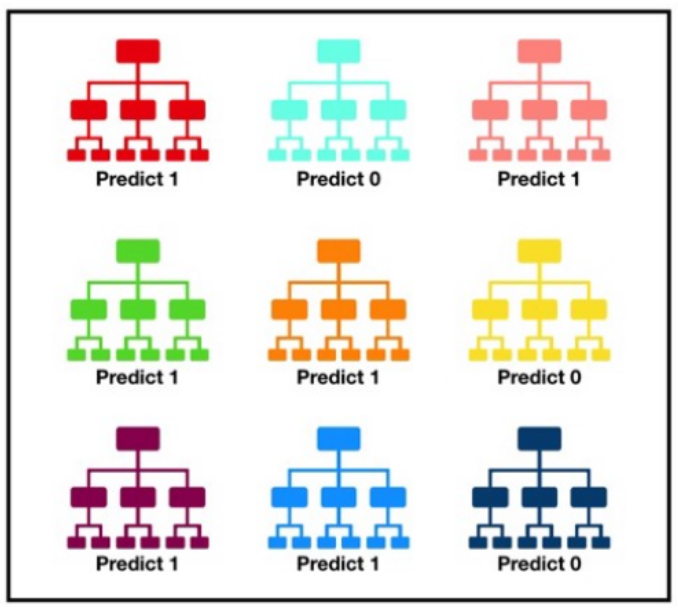

Random Forest algorithm has been implemented in the following code block below. 

1. A RandomForestClassifier class instance "rforest" has been intialized and its parameters details are as follow:

    - *n_estimators* - A hyperparameter which indicates the number of trees the algorithm will build. Typically a higher number of trees increases the accuracy and stability but it slows down the computation.
    - *max_depth* - The max depth of the tree
    - *max_features* - The maximum number of features the algorithm considers to split a node. ***sqrt*** option will take square root of the total number of features in individual run. 
    - *min_sample_split* - The minimum number of samples required to split an internal node.
    - *n_jobs* - it is just the number of processors the algorithm can use, or number of jobs run in parallel.
    - *verbose* - controls the verbosity when fitting and predicting.

On average, it seems to be a better choice, as a default setting, to set max_features=sqrt(n_features) for classification and max_features=n_features for regression. [7] 

2. *rforest.fit* - training the model with training data
3. *rforest.predict* - passing the test data through the model
4. Calculating and printing the accuracy of the model by using the following formula  Accuracy = 1 - (y_pred != testY).sum()/len(testY)
*where y_pred is the prediction of our model and testY is our original test dataset labels*
 
5. *Confusion Matrix* - It tells that how many of classifier's predictions were correct. Also, in this case, we can calculate the accuracy of the model from the confusion matrix simply by adding up the diagonal and dividing it by total number of test data reviews i.e. 400k

## First run 200 trees

The number of trees in the forest are set to 200 here, with maximum depth of 25.

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [5]:
## RANDOMFOREST
# Random Forest start timer
print('RandomForest, 200 trees with max depth of 25')
start = timeit.default_timer()
# Importing trees
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=200, max_depth=25,
                            max_features="sqrt", min_samples_split=20,
                            n_jobs=3, verbose=0)
rforest.fit(trainX, trainY)
y_pred = rforest.predict(testX)
# Random Forest stop timer
stop = timeit.default_timer()
print('Time: ', stop - start)

#Performance Measures
accuracy_rf200 = 100*accuracy_score(testY,y_pred)
precision_rf200 = 100*precision_score(testY,y_pred)
f1_rf200 = 100*f1_score(testY,y_pred)
# Printing results
print("Out of", len(testY), 'datapoints')
print("Accuracy: {:.04f}%".format(accuracy_rf200))
print("Precision: {:.04f}%".format(precision_rf200))
print("F1 score: {:.04f}%".format(f1_rf200))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print("Confusion Matrix: \n",m)

RandomForest, 200 trees with max depth of 25
Time:  1372.9183778000006
Out of 400000 datapoints
Accuracy: 84.3478%
Precision: 82.1204%
F1 score: 84.8723%
Confusion Matrix: 
 [[161761  38239]
 [ 24370 175630]]


Just to test, *if we add (161761 + 175630) i.e. the values on the principal diagonal of confusion matrix*, we get => 337391. <br>
Dividing this number by 400000 (i.e. total rows in test set) <br>
*We get, **0.8434775**, which is our accuracy.* 

In [6]:
y_perf_rf200 = np.array(["Accuracy","Precision","F1"])
ypos = np.arange(len(y_perf_rf200))
y_val_rf200 = np.array([accuracy_rf200,precision_rf200,f1_rf200])

<BarContainer object of 3 artists>

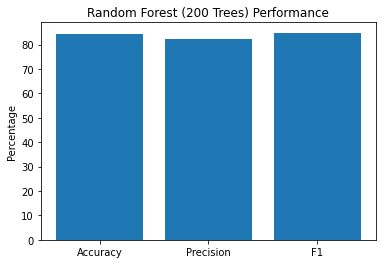

In [7]:
plt.xticks(ypos,y_perf_rf200)
plt.ylabel("Percentage")
plt.title("Random Forest (200 Trees) Performance")
plt.bar(ypos,y_val_rf200)

## Second run 400 trees

In [8]:
## RANDOMFOREST
# Random Forest start timer
print('RandomForest, 400 trees with max depth of 25')
start = timeit.default_timer()
# Importing trees
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=400, max_depth=25,
                            max_features="sqrt", min_samples_split=20,
                            n_jobs=3, verbose=0)
rforest.fit(trainX, trainY)
y_pred = rforest.predict(testX)
# Random Forest stop timer
stop = timeit.default_timer()
print('Time: ', stop - start)


RandomForest, 400 trees with max depth of 25
Time:  2718.1112208000013
Out of 400000 points, our accuracy were 84.238%.
[[161158  38842]
 [ 24206 175794]]


In [11]:
#Performance Measures
accuracy_rf400 = 100*accuracy_score(testY,y_pred)
precision_rf400 = 100*precision_score(testY,y_pred)
f1_rf400 = 100*f1_score(testY,y_pred)
# Printing results
print("Out of", len(testY), 'datapoints')
print("Accuracy: {:.04f}%".format(accuracy_rf400))
print("Precision: {:.04f}%".format(precision_rf400))
print("F1 score: {:.04f}%".format(f1_rf400))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print("Confusion Matrix: \n",m)

Out of 400000 datapoints
Accuracy: 84.2380%
Precision: 81.9033%
F1 score: 84.7944%
Confusion Matrix: 
 [[161158  38842]
 [ 24206 175794]]


In [12]:
y_perf_rf400 = np.array(["Accuracy","Precision","F1"])
ypos = np.arange(len(y_perf_rf400))
y_val_rf400 = np.array([accuracy_rf400,precision_rf400,f1_rf400])

<BarContainer object of 3 artists>

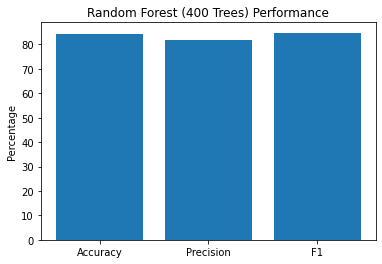

In [13]:
plt.xticks(ypos,y_perf_rf400)
plt.ylabel("Percentage")
plt.title("Random Forest (400 Trees) Performance")
plt.bar(ypos,y_val_rf400)

In [14]:
y_accu_rf = np.array(["200 Trees","400 Trees"])
y_f1_rf = np.array(["200 Trees","400 Trees"])
ypos = np.arange(len(y_accu_rf))
y_val_accurf = np.array([accuracy_rf200,accuracy_rf400])
y_val_f1rf = np.array([f1_rf200,f1_rf400])

<BarContainer object of 2 artists>

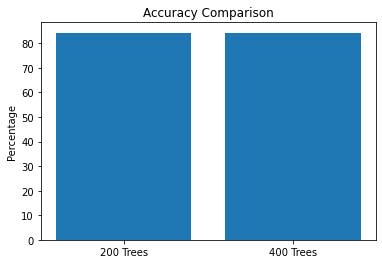

In [15]:
plt.xticks(ypos,y_accu_rf)
plt.ylabel("Percentage")
plt.title("Accuracy Comparison")
plt.bar(ypos,y_val_accurf)

<BarContainer object of 2 artists>

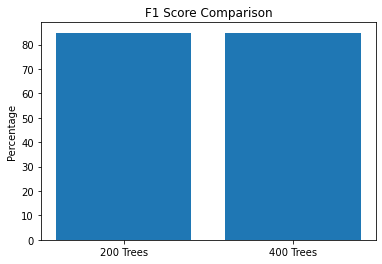

In [16]:
plt.xticks(ypos,y_f1_rf)
plt.ylabel("Percentage")
plt.title("F1 Score Comparison")
plt.bar(ypos,y_val_f1rf)

# Conclusion

The RandomForest algorithm is very similar to that of decision trees. Except that you grow several decision trees, then average their results, to make a prediction.

This algorithm is poorly suited for binary problems (such as this), being more well fitted to multi-class problems. Despite that we got an 84% success rate. We can also see that increasing the number of trees does not really improve the success rate.

The variables in the RandomForestClassifier were set after some trial and error to find the ideal setting for both accuracy and time. It might be possible to tweak out a little more accuracy, but it is clear even from this small sample that it cannot compete with say LinearSVC.

# Referrences
[1] A Complete Guide To the Random Forest Algorithm<br>
Niklas Donges - https://builtin.com/data-science/random-forest-algorithm

[2] Understanding Random Forest<br>
Tony Yiu - https://towardsdatascience.com/understanding-random-forest-58381e0602d2

[3] Sklearn.ensemble.randomforestclassifier <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[4] Random Forest Parameter Tuning: Tuning Random Forest<br>
Tavish Srivastava - https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

[5] CountVectoizer from sklearn<br>
https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

[6] Random Forest Classification<br>
https://medium.com/swlh/random-forest-classification-and-its-implementation-d5d840dbead0

[7] Extremely randomized trees<br>
https://orbi.uliege.be/bitstream/2268/9357/1/geurts-mlj-advance.pdf